<a href="https://colab.research.google.com/github/BulkaKrz/BulkaKrz/blob/main/seabotn_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
url = 'https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


***
### Wstępnie oczyszczamy dane 

In [20]:
df.TotalCharges.value_counts()
# w columnie TotalCharges mamy 11 wierszy bez danych dlatego też jako typ danych mamy object a nie float64

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [21]:
TotalCharges_median = df[df.TotalCharges != ' ']['TotalCharges'].astype('float32').median()

In [22]:
df['TotalCharges'][df['TotalCharges'] == ' '] = TotalCharges_median

<ipython-input-22-e352be2e3cbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'][df['TotalCharges'] == ' '] = TotalCharges_median


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df.TotalCharges.value_counts()

1397.4751    11
20.2         11
19.75         9
20.05         8
19.9          8
             ..
6849.4        1
692.35        1
130.15        1
3211.9        1
6844.5        1
Name: TotalCharges, Length: 6531, dtype: int64

In [26]:
df['TotalCharges'] = df['TotalCharges'].astype('float32')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
if not df.isnull().sum().sum():
  print("Nie ma braków")
  #sprawdzamy czy nie ma wartości nulowych

NIe ma braków


In [32]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'StreamingMovies',
               'PaperlessBilling', 'PaymentMethod', 'Churn']

In [34]:
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
# tworzymy które mają być typem kategoria oraz które mająbyć typem numerycznym

In [36]:
for col in categorical:
  df[col] = pd.Categorical(df[col])

for col in numerical:
  df[col] = df[col].astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float32 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [37]:
df = df.drop(columns=['customerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float32 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [38]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371147,64.761696,2281.916992
std,24.559481,30.090048,2265.270508
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,402.225006
50%,29.000000,70.349998,1397.475098
75%,55.000000,89.849998,3786.599976
max,72.000000,118.750000,8684.799805


In [41]:
df.describe(include=['category'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [43]:
df.MultipleLines.unique()

['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']

***
### wykres CHURN

In [48]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

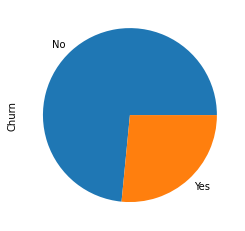

In [49]:
df.Churn.value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Rozkład Churn')

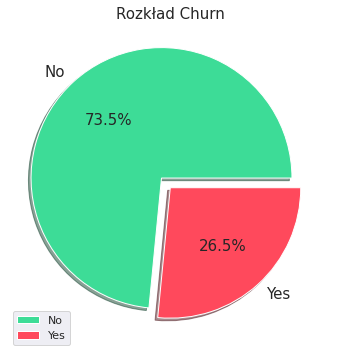

In [69]:
plt.figure(figsize=(8,6))
sns.set()
df.Churn.value_counts().plot(kind='pie', fontsize=15, colors=['#3DDC97', '#FF495C'],
                             explode=[0.1,0],
                             shadow=True,
                             autopct= '%1.1f%%',)
plt.legend()
plt.ylabel("")
plt.title('Rozkład Churn', fontsize=15)

Text(0.5, 1.0, 'Rozkład Płci')

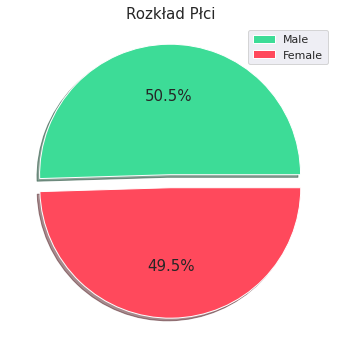

In [73]:
plt.figure(figsize=(8,6))
sns.set()
df.gender.value_counts().plot(kind='pie', fontsize=15,
                             labels=["",""], 
                             colors=['#3DDC97', '#FF495C'],
                             explode=[0.1,0],
                             shadow=True,
                             autopct= '%1.1f%%',)
plt.legend()
plt.ylabel("")
plt.legend(['Male', 'Female'])
plt.title('Rozkład Płci', fontsize=15)

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


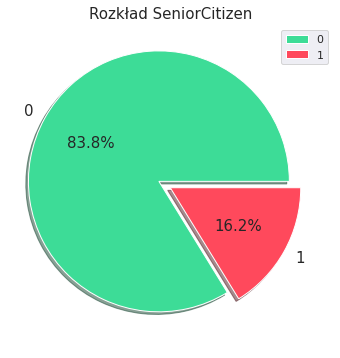

In [74]:
 plt.figure(figsize=(8,6))

df.SeniorCitizen.value_counts().plot(kind='pie', fontsize=15, colors=['#3DDC97', '#FF495C'],
                             explode=[0.1,0],
                             shadow=True,
                             autopct= '%1.1f%%',)
plt.legend()
plt.ylabel("")
plt.title('Rozkład SeniorCitizen', fontsize=15)
print(df.SeniorCitizen.value_counts())

***
### Rozkład zmiennych numerycznych

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


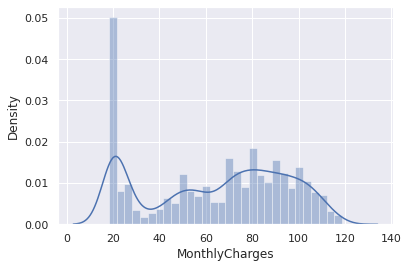

In [76]:
sns.distplot(df.MonthlyCharges, bins=30)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


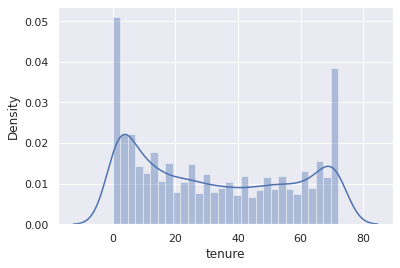

In [77]:
sns.distplot(df.tenure, bins=30)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


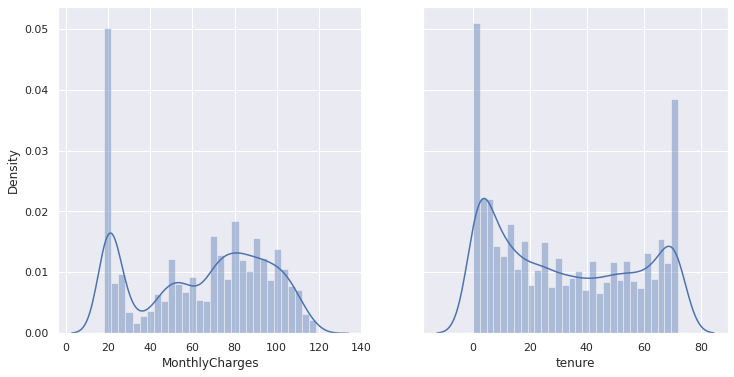

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))
sns.distplot(df.MonthlyCharges, bins=30, ax=ax[0])
sns.distplot(df.tenure, bins=30, ax=ax[1])


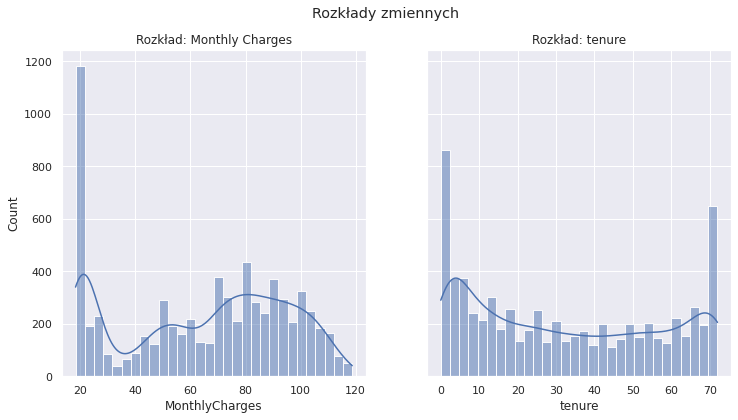

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))
sns.histplot(df.MonthlyCharges, bins=30, kde=True, ax=ax[0])
sns.histplot(df.tenure, bins=30, kde=True, ax=ax[1])
fig.suptitle('Rozkłady zmiennych')
ax[0].title.set_text('Rozkład: Monthly Charges')
ax[1].title.set_text('Rozkład: tenure')

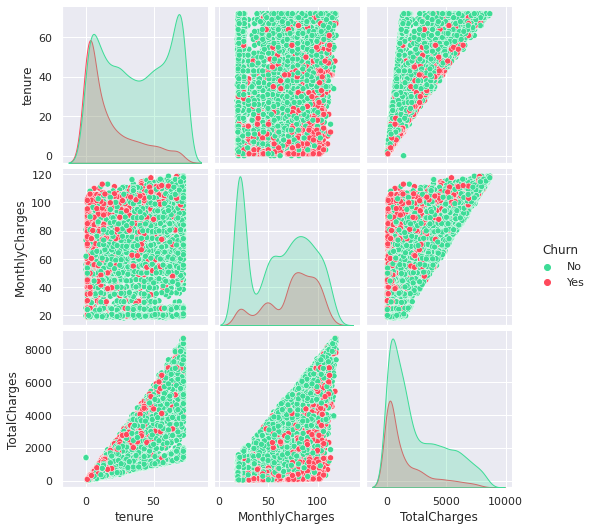

In [99]:
sns.pairplot(data=df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn',
             palette=['#3DDC97', '#FF495C'])

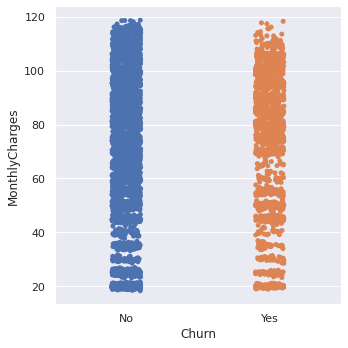

In [100]:
sns.catplot(data=df, x='Churn', y='MonthlyCharges')

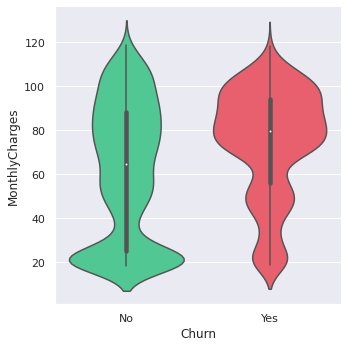

In [102]:
sns.catplot(data=df, x='Churn', y='MonthlyCharges',
            kind='violin', palette=['#3DDC97', '#FF495C'])

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try violinplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try violinplot
  warnings.warn(msg, UserWarning)


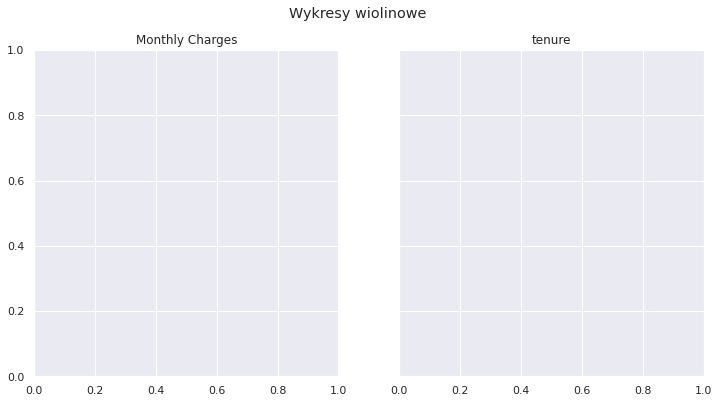

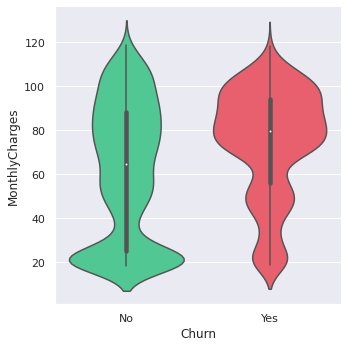

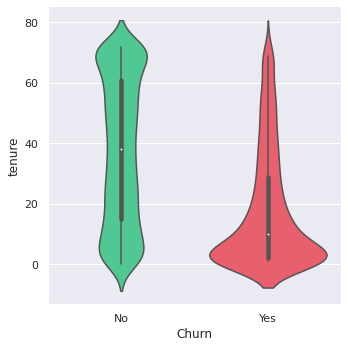

In [118]:
fig, ax= plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))
sns.catplot(data=df, x='Churn', y='MonthlyCharges',
            kind='violin', palette=['#3DDC97', '#FF495C'],
            ax=ax[0])
sns.catplot(data=df, x='Churn', y='tenure',
            kind='violin', palette=['#3DDC97', '#FF495C'],
            ax=ax[1])


fig.suptitle('Wykresy wiolinowe')
ax[0].title.set_text('Monthly Charges')
ax[1].title.set_text('tenure')


***
### Macierz korelacji

In [119]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


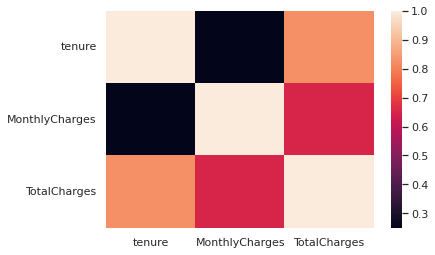

In [124]:
sns.heatmap(df.corr())

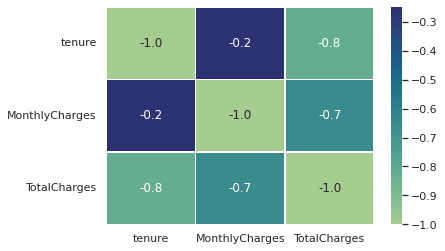

In [144]:
sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidth=.5, cmap="crest")

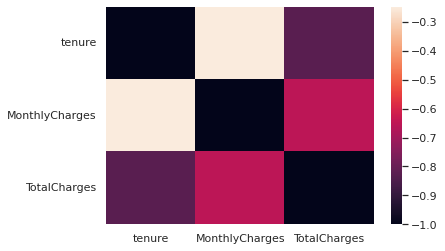

In [145]:
sns.heatmap(df.corr()*(-1))